           x1   x2   x3    ...   xn
            \   \   \          /
             \   \   \        /
              \   \   \      /
               \   \   \    /
                \   \   \  /
                 \   \   \/
                   -------
                     |
                     y

      Input Layer         Hidden Layer          Output Layer
      +-----+             +-----+-----+          +-----+
      |     |             |     |     |          |     |
----->|  x1 |-------------|  h1 |  o1 |--------->|  y  |
      |     |             |     |     |          |     |
      +-----+             +-----+-----+          +-----+
      |     |             |     |     |          |     |
----->|  x2 |-------------|  h2 |     |          |     |
      |     |             |     |     |          |     |
      +-----+             +-----+-----+          +-----+
                          |     |     |          |     |
                          |  h3 |     |          |     |
                          |     |     |          |     |
                          +-----+-----+          +-----+
                          |     |     |          |     |
                          |  h4 |     |          |     |
                          |     |     |          |     |
                          +-----+-----+          +-----+


        +---- dendrites ----+
        |                   |
        v                   |
   +---------+              |
   |         |   neurotransmitter
   |         +--------------+
   |  cell   |              |
   |         +------------->+
   |         |              |
   +---------+        axon  v
        |                   |
        +--- synapse -------+


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha * x, x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 100)

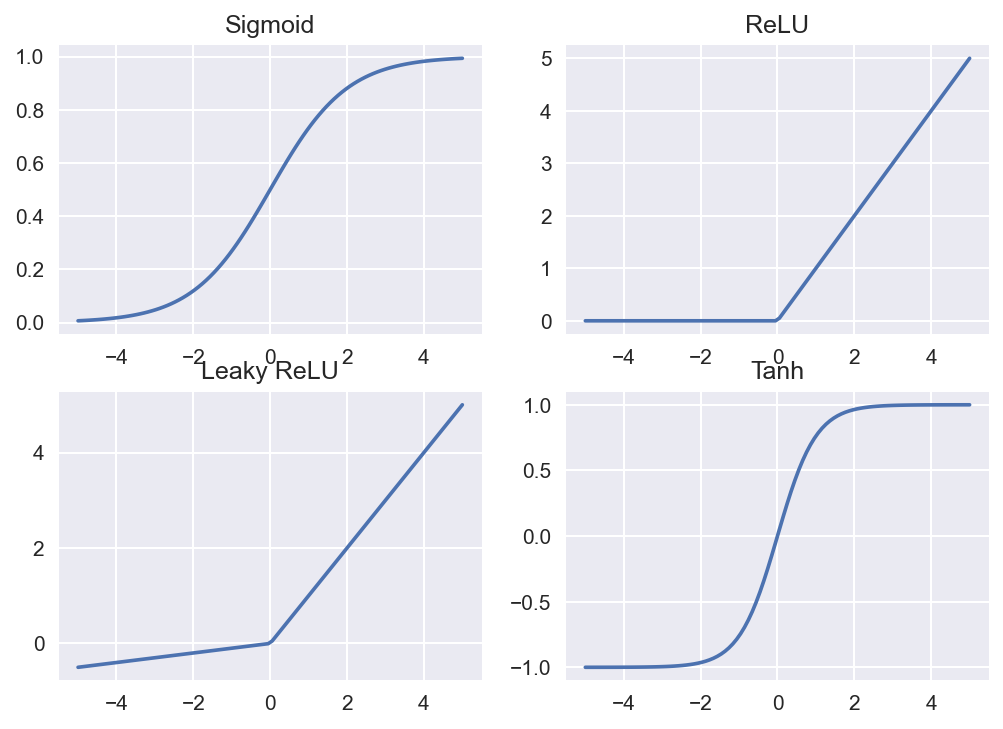

In [3]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(2, 2, dpi=150)

ax[0, 0].plot(x, sigmoid(x))
ax[0, 0].set_title("Sigmoid")

ax[0, 1].plot(x, relu(x))
ax[0, 1].set_title("ReLU")

ax[1, 0].plot(x, leaky_relu(x))
ax[1, 0].set_title("Leaky ReLU")

ax[1, 1].plot(x, tanh(x))
ax[1, 1].set_title("Tanh")

plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义激活函数sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 构建一个三层的神经网络，输入层有两个节点，隐藏层有三个节点，输出层有一个节点
input_data = np.array([0.3, 0.7])  # 输入数据
W1 = np.array([[0.2, 0.5, -0.1], [-0.3, 0.4, 0.6]])  # 输入层到隐藏层的连接权重
b1 = np.array([0.1, 0.2, -0.3])  # 隐藏层的偏置项
W2 = np.array([[0.4], [0.1], [-0.2]])  # 隐藏层到输出层的连接权重
b2 = np.array([-0.1])  # 输出层的偏置项

# 前向传播计算输出
z1 = np.dot(input_data, W1) + b1  # 第一层的加权和
a1 = sigmoid(z1)  # 第一层的输出，即第二层的输入
z2 = np.dot(a1, W2) + b2  # 第二层的加权和
output = sigmoid(z2)  # 神经网络的输出结果

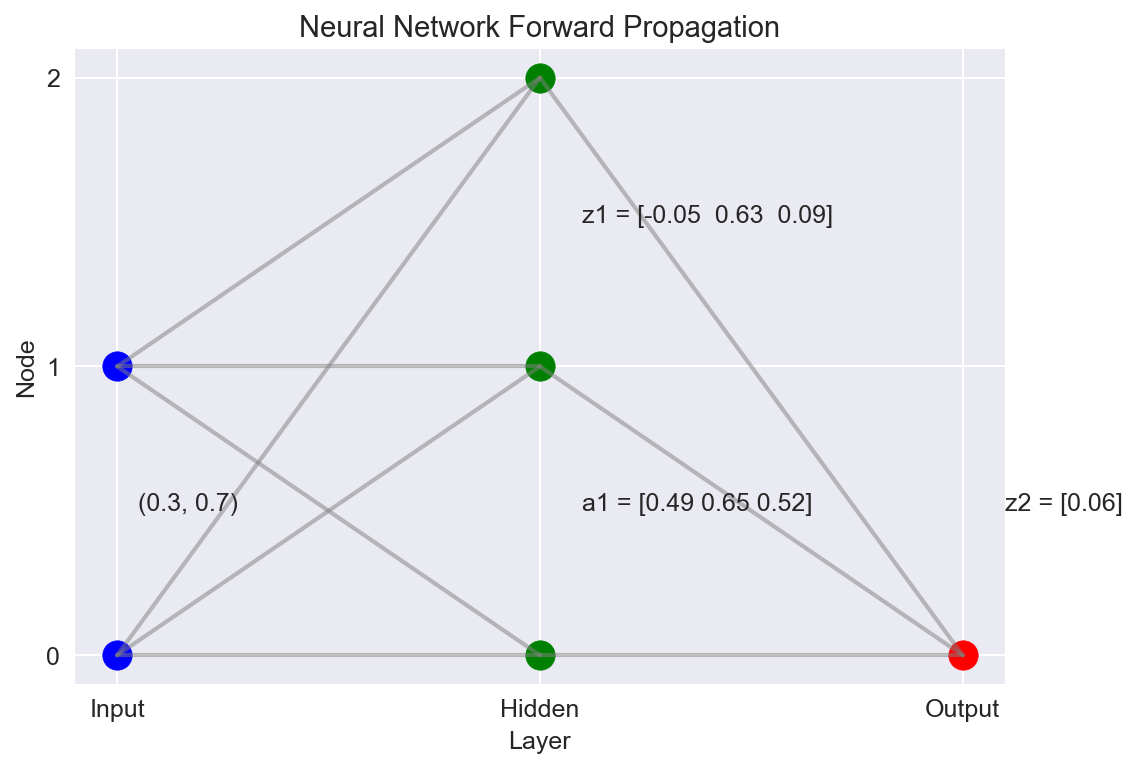

In [5]:
# 可视化神经网络结构和输出结果
fig, ax = plt.subplots(dpi=150)

# 绘制输入层节点
ax.scatter([0, 0], [0, 1], s=200, color='b')
ax.annotate(f'({input_data[0]}, {input_data[1]})', xy=(0.05, 0.5), fontsize=12)

# 绘制隐藏层节点
for i in range(3):
    ax.scatter([1], [i], s=200, color='g')
ax.annotate(f'z1 = {np.round(z1, 2)}', xy=(1.1, 1.5), fontsize=12)
ax.annotate(f'a1 = {np.round(a1, 2)}', xy=(1.1, 0.5), fontsize=12)

# 绘制输出层节点
ax.scatter([2], [0], s=200, color='r')
ax.annotate(f'z2 = {np.round(z2, 2)}', xy=(2.1, 0.5), fontsize=12)
ax.annotate(f'output = {np.round(output, 2)}', xy=(2.1, -0.5), fontsize=12)

# 绘制连接线
for i in range(2):
    for j in range(3):
        ax.plot([0, 1], [i, j], lw=2, alpha=0.5, color='gray')
for j in range(3):
    ax.plot([1, 2], [j, 0], lw=2, alpha=0.5, color='gray')

# 设置图形标题和坐标轴标签
ax.set_title('Neural Network Forward Propagation', fontsize=14)
ax.set_xlabel('Layer', fontsize=12)
ax.set_ylabel('Node', fontsize=12)
plt.xticks([0, 1, 2], ['Input', 'Hidden', 'Output'], fontsize=12)
plt.yticks([0, 1, 2], ['0', '1', '2'], fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 定义Sigmoid激活函数
def sigmoid(x):
    """Sigmoid函数用于将输入值映射到0到1之间，常用于神经网络的激活函数。"""
    return 1 / (1 + np.exp(-x))

# 定义神经网络模型
def neural_network(input, weights):
    """神经网络模型，包含一个隐藏层和一个输出层，使用Sigmoid激活函数。"""
    # 计算隐藏层的输出
    hidden_layer = sigmoid(np.dot(input, weights[0]))
    # 计算输出层的输出
    output_layer = sigmoid(np.dot(hidden_layer, weights[1]))
    return output_layer

# 定义训练数据
input_data = np.array([[0, 0, 1],  # 输入数据
                       [0, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])
labels = np.array([[0, 1, 1, 0]]).T  # 目标输出（标签）

# 定义神经网络的参数
input_size = 3  # 输入层大小
hidden_size = 4  # 隐藏层大小
output_size = 1  # 输出层大小
learning_rate = 0.1  # 学习率
weights = [np.random.randn(input_size, hidden_size),  # 初始化隐藏层权重
           np.random.randn(hidden_size, output_size)]  # 初始化输出层权重

# 训练神经网络
losses = []  # 用于记录每次迭代的损失
for i in range(10000):  # 训练迭代次数
    # 前向传播
    hidden_layer = sigmoid(np.dot(input_data, weights[0]))  # 计算隐藏层输出
    output_layer = sigmoid(np.dot(hidden_layer, weights[1]))  # 计算输出层输出
    
    # 计算误差
    error = output_layer - labels
    
    # 反向传播
    output_delta = error * output_layer * (1 - output_layer)  # 输出层误差
    hidden_error = output_delta.dot(weights[1].T)  # 隐藏层误差
    hidden_delta = hidden_error * hidden_layer * (1 - hidden_layer)  # 隐藏层误差项
    
    # 更新权重
    weights[1] -= learning_rate * hidden_layer.T.dot(output_delta)  # 更新输出层权重
    weights[0] -= learning_rate * input_data.T.dot(hidden_delta)  # 更新隐藏层权重
    
    # 计算损失函数
    loss = np.mean(np.abs(error))  # 平均绝对误差
    losses.append(loss)  # 记录损失

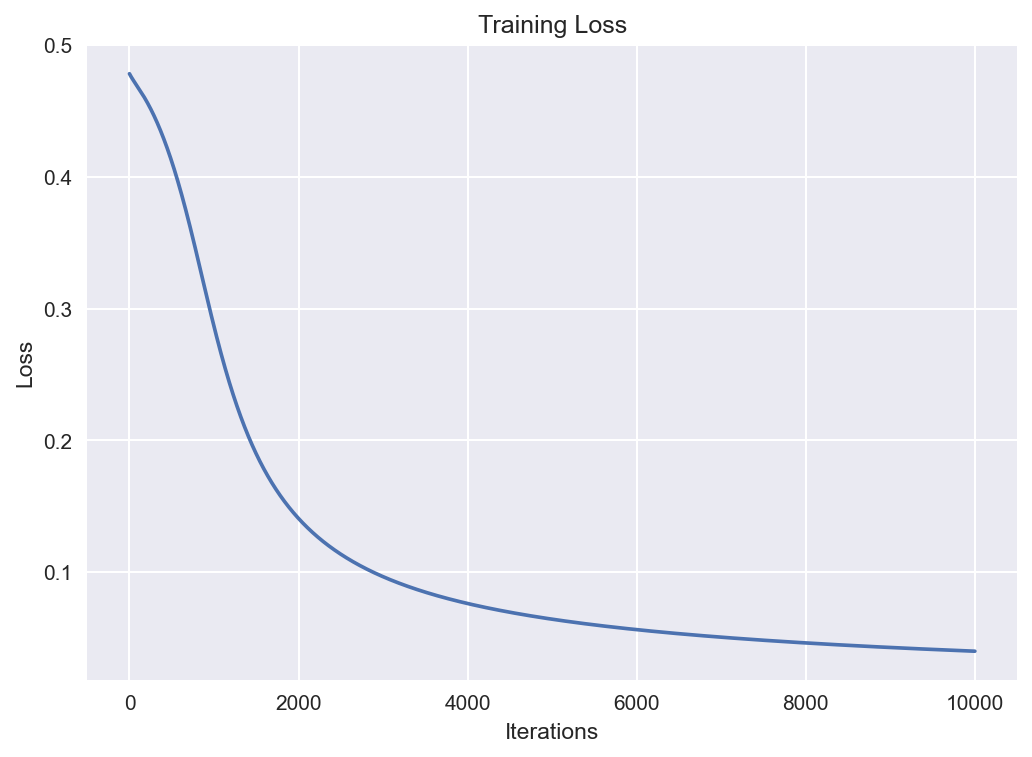

In [8]:
# 可视化训练过程
plt.figure(dpi=150)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()